In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

from maze import CliffEnv
from agents import Agent
from policies import EpsilonGreedy, Parameters
from optimizers import SARSA_optimizer, Qlearning_optimizer

# 崖歩き

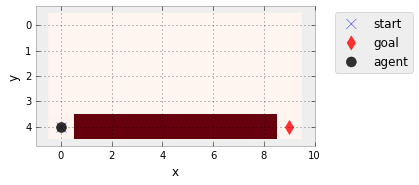

In [2]:
%matplotlib inline
Env = CliffEnv(10,5)
Env.reset()
Env.render()

濃い部分は崖で、ここに落ちると報酬 $-100$ が与えられてしまう！これは
[Sutton&Bartoの教科書](http://incompleteideas.net/book/the-book.html)
で紹介されている、SARSAとQ学習の差が明確になる例。まずSARSA

## ● SARSA

In [3]:
%%time
q = Parameters(Env)
Agt = Agent(Policy=EpsilonGreedy(Env=Env, Q=q))
Opt = SARSA_optimizer(Agt, eta=1., gamma=0.2)
N_episode = 6000

for episode in range(N_episode):
    Env.reset()
    while not Env.is_solved():
        s = Env.get_state()
        a = Agt.play()
        s_next, r_next, _, _ = Env.step(a)
        Opt.update(s, a, r_next, s_next)

CPU times: user 17.6 s, sys: 274 ms, total: 17.9 s
Wall time: 17.9 s


<IPython.core.display.Javascript object>


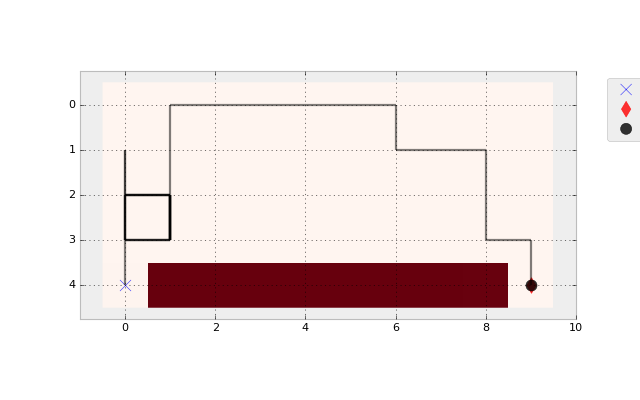

solved!


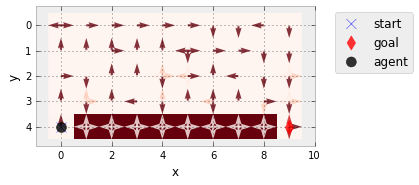

In [4]:
Env.reset()
%matplotlib notebook 
Env.play_interactive(Agt)
%matplotlib inline
Env.reset()
Env.render(values_table=q.values_table)

このようにSARSAでは崖に落ちる＝負の報酬を避けつつゴールするようになる。これはSARSAの更新において、実際に穴に落ちた時に受け取った負の報酬が考慮されているから。

## ● Q学習

In [5]:
%%time
q = Parameters(Env)
Agt = Agent(Policy=EpsilonGreedy(Env=Env, Q=q))
Opt = Qlearning_optimizer(Agt, eta=1., gamma=0.2)
N_episode = 6000

for episode in range(N_episode):
    Env.reset()
    while not Env.is_solved():
        s = Env.get_state()
        a = Agt.play()
        s_next, r_next, _, _ = Env.step(a)
        Opt.update(s, a, r_next, s_next)

CPU times: user 5 s, sys: 134 ms, total: 5.13 s
Wall time: 5.02 s


<IPython.core.display.Javascript object>


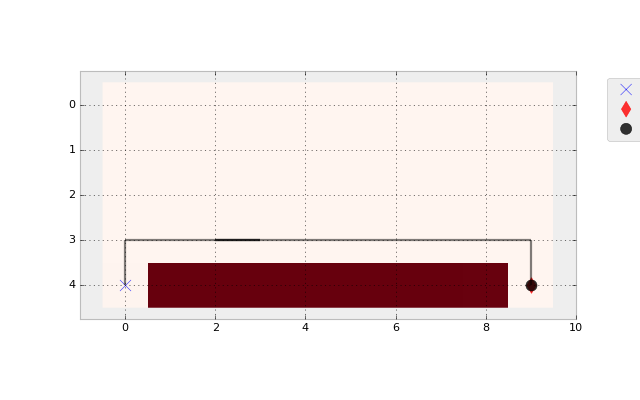

solved!


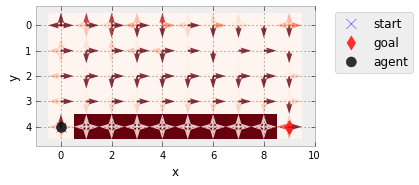

In [6]:
Env.reset()
%matplotlib notebook 
Env.play_interactive(Agt)
%matplotlib inline
Env.reset()
Env.render(values_table=q.values_table)

一方でQ学習では崖に落ちるのを怖がらず(?)に、最短経路でゴールに向かうようになる。これはQ学習のアルゴリズムでは、実際に崖に落ちた経験は無視され、最適な行動のみを考慮しているかららしい。

まとめると
* SARSAは**実際の方策**に従って取った行動を**反映する**。これは「**方策オン**型」と呼ばれる
* Q学習は**実際の方策**に従って取った行動を**反映しない**。これは「**方策オフ**型」と呼ばれる